<a href="https://colab.research.google.com/github/gdtan02/CV_Assignment_LLIE/blob/main/notebooks/ZeroDCE_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-DCE Testing

## Environment Setup

Connect to Tesla T4 runtime before running any code block below.

In [ ]:
!nvidia-smi

Mon Dec 16 07:33:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
!git clone https://github.com/gdtan02/CV_Assignment_LLIE.git

Cloning into 'CV_Assignment_LLIE'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 98 (delta 46), reused 59 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 6.05 MiB | 7.47 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
%cd CV_Assignment_LLIE/

/content/CV_Assignment_LLIE


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 2.7 MB/s eta 0:00:00


## Importing Dark Face Dataset and pretrained models

In [4]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import shuffle
from glob import glob
from zero_dce import (
    download_test_dataset,
    Trainer, plot_result
)
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

mpl.rcParams['figure.max_open_warning'] = 0
%matplotlib inline

In [5]:
download_test_dataset()

Dataset file path =  /content/CV_Assignment_LLIE/data/DarkPair.zip


Downloading...
From (original): https://drive.google.com/uc?id=11KaOhxcOh68_NyZwacBoabEJ6FgPCsnQ
From (redirected): https://drive.google.com/uc?id=11KaOhxcOh68_NyZwacBoabEJ6FgPCsnQ&confirm=t&uuid=e959a9a3-045d-48f6-a4e8-9ba4b1ca5fd7
To: /content/CV_Assignment_LLIE/data/DarkPair.zip
100%|██████████| 580M/580M [00:06<00:00, 92.3MB/s]


Unzip the Dark Face dataset...
Done.


In [6]:
image_path = os.path.join(os.getcwd(), "data", "Low", "*.png")
image_files = glob(image_path)

if image_files is not None:
  print("Image files have been loaded.")
  print(f"Number of images: {len(image_files)}")
else:
  print("No image files found.")

Image files have been loaded.
Number of images: 789


In [7]:
trainer = Trainer()
trainer.build_model(pretrain_weights="models/checkpoints/model200_dark_faces.pth")
trainer.build_enhanced_model(pretrain_weights="models/checkpoints/enhanced_epoch200.pth")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

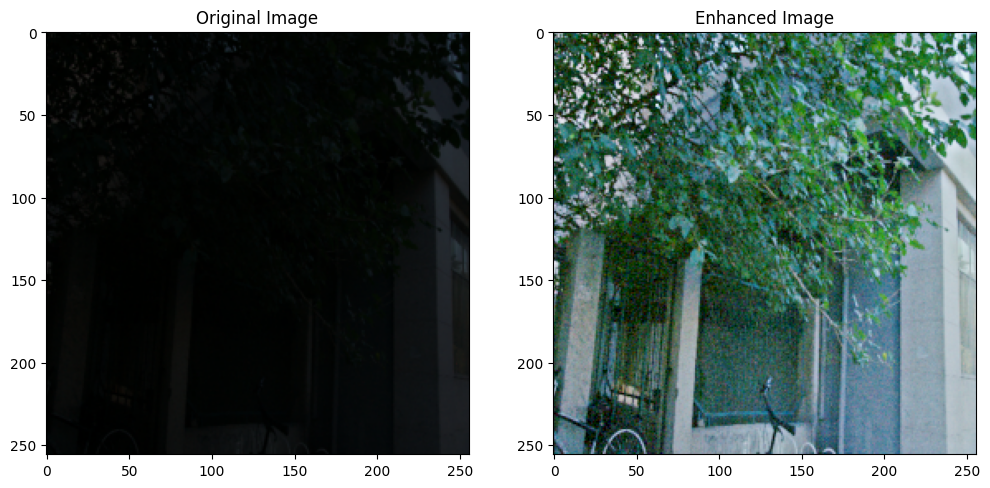

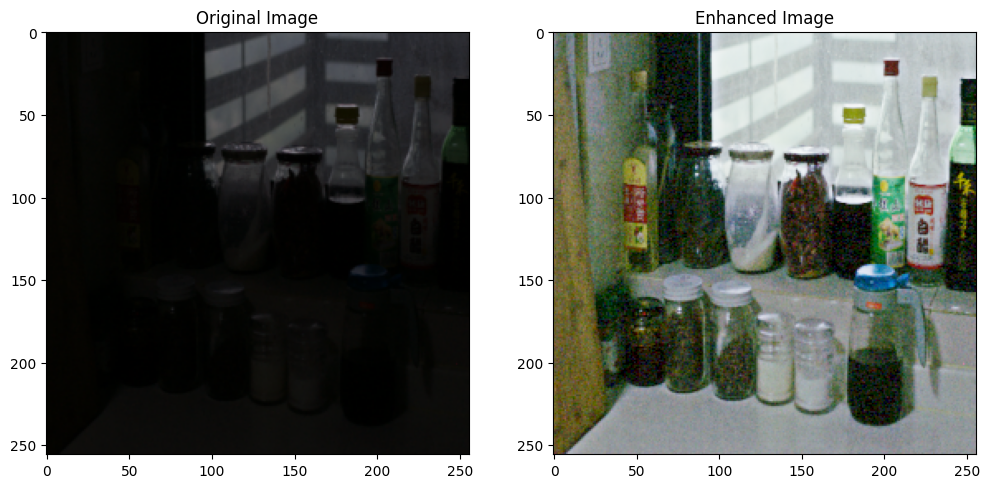

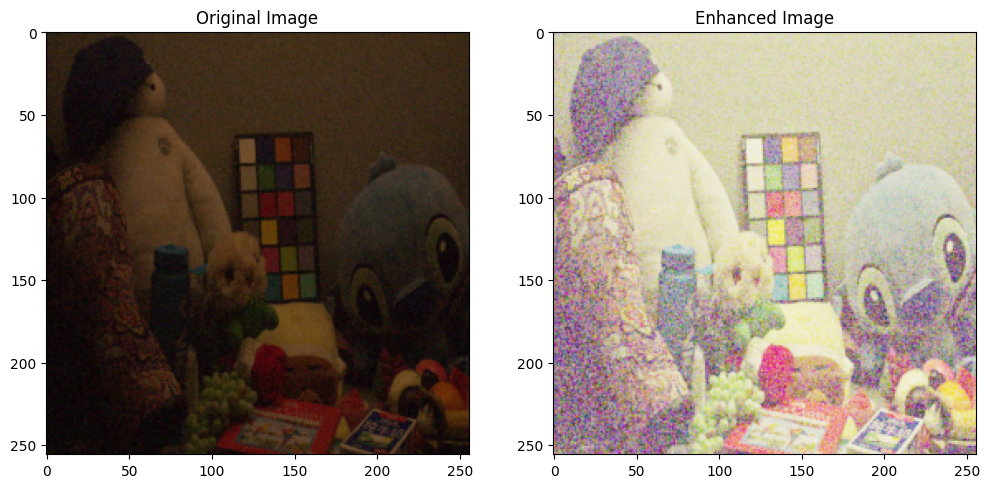

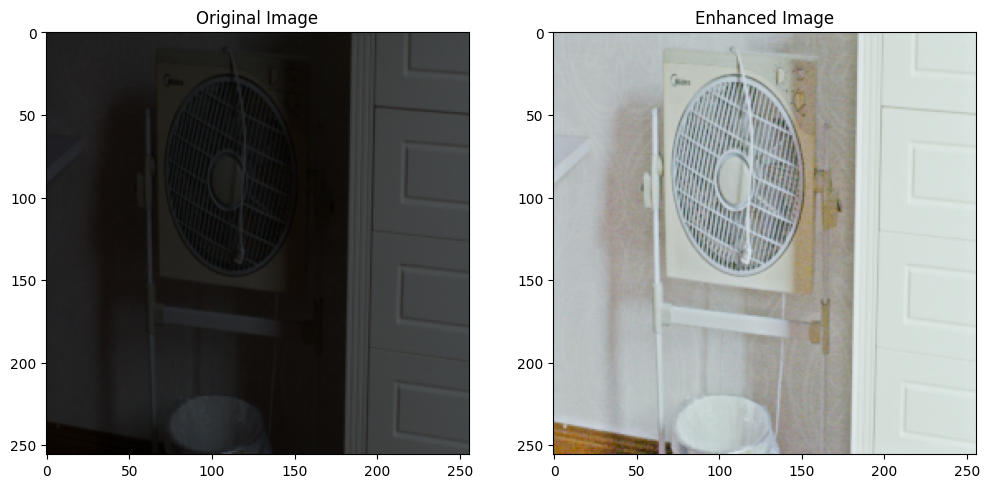

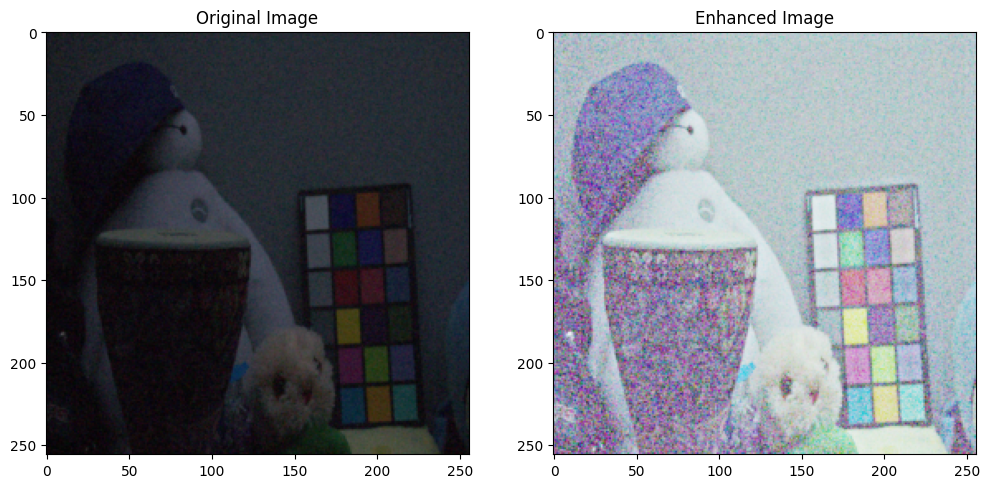

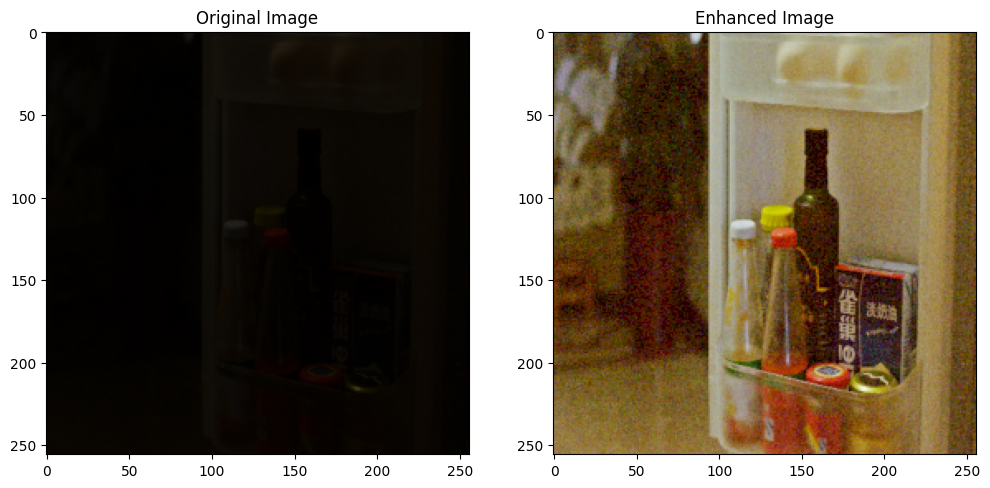

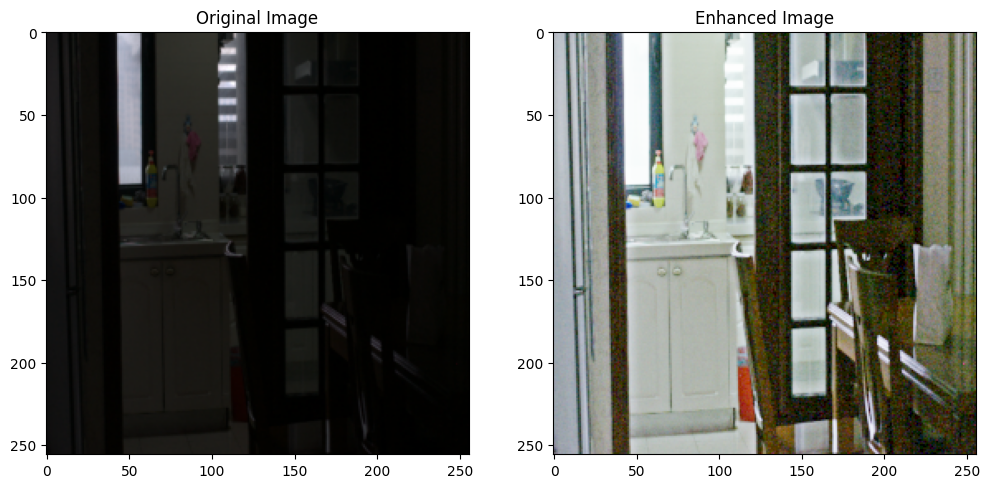

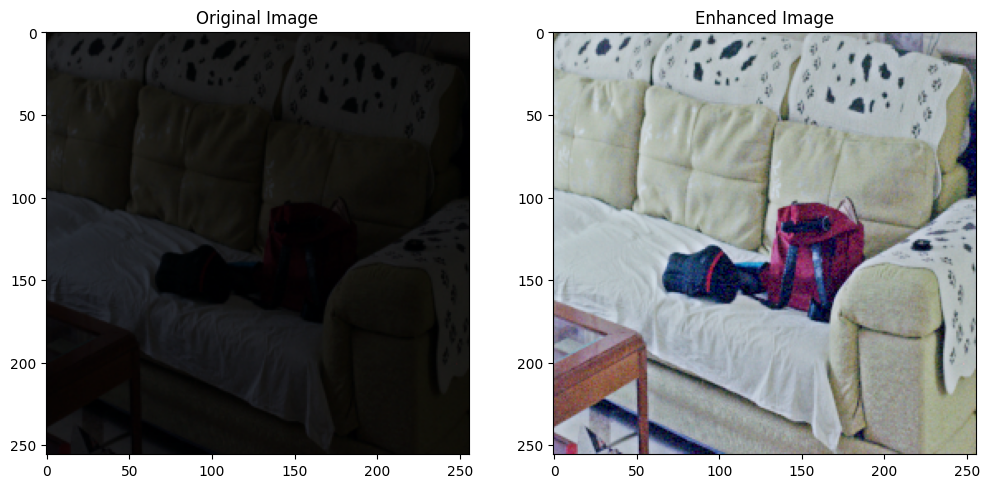

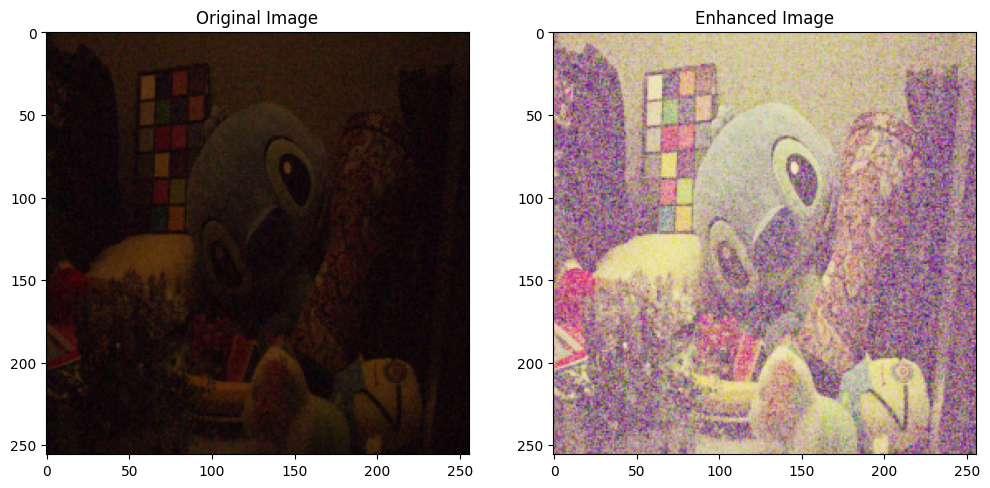

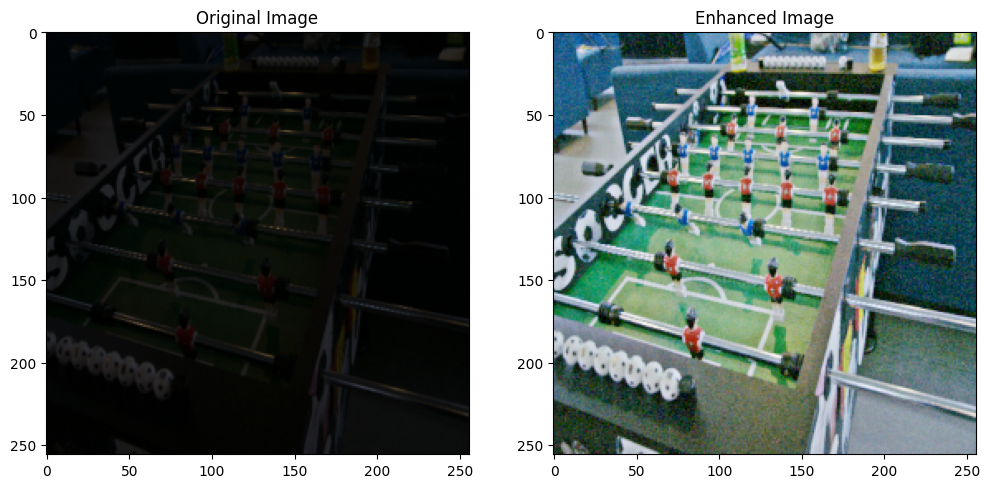

In [ ]:
def evaluate_model(trainer, model, image_files):

  psnr_values = []
  ssim_values = []
  mse_values = []

  for image in image_files:
    org_image, enhanced_image = trainer.evaluate(model, image)
    plot_result(org_image, enhanced_image, notebook=True)

    # Convert org_image to numpy array and remove the batch dimension
    org_image = org_image.squeeze(0).permute(1, 2, 0).cpu().numpy()

    psnr_value = psnr(org_image, enhanced_image, data_range=255)
    ssim_value = ssim(org_image, enhanced_image, data_range=255, win_size=3, channel_axis=-1)
    mse_value = mse(org_image, enhanced_image)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)
    mse_values.append(mse_value)

  return psnr_values, ssim_values, mse_values
